In [1]:
# work on auto updating and/or downloading the new row of the google sheet every day (at 00:00:00)
# https://www.reddit.com/r/linux4noobs/comments/jlpu35/how_to_download_a_google_sheet_everyday_with/
# https://gist.github.com/abhijeetchopra/99a11fb6016a70287112

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

In [2]:
import os
cwd = os.getcwd()
cwd
# to get file path name so you can export charts
# https://stackoverflow.com/questions/13825719/python-how-do-i-save-a-file-in-a-different-directory

'/home/mcwaage1/qs/writing'

In [3]:
sns.set()

In [4]:
writing_df = pd.read_csv('~/qs/writing/data/WordCount2020.csv')

# loading the csv file

In [5]:
writing_df

,Date,Word Count Total,Daily Word Count,Average Daily Word Count,Cultists,A Space Story,The Forest,The Book,The Pyramid,Monsters in the Arena,Banished/Disconnected,The Cyberjunkie,Random Tidbits,Pull YourselfTogether,The Eye,Sirens
0,12/29/19,489,489,489,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/30/19,489,0,245,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/31/19,489,0,163,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/20,738,249,185,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/2/20,738,0,148,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,12/28/20,49332,0,135,7213,1558.0,3157.0,8783.0,3404.0,12867.0,7664.0,3277.0,823.0,NaN,NaN,586.0
366,12/29/20,49332,0,134,7213,1558.0,3157.0,8783.0,3404.0,12867.0,7664.0,3277.0,823.0,NaN,NaN,586.0
367,12/30/20,49332,0,134,7213,1558.0,3157.0,8783.0,3404.0,12867.0,7664.0,3277.0,823.0,NaN,NaN,586.0
368,12/31/20,49332,0,134,7213,1558.0,3157.0,8783.0,3404.0,12867.0,7664.0,3277.0,823.0,NaN,NaN,586.0


In [6]:
writing_df.shape

(370, 16)

In [7]:
writing_df.describe()

,Word Count Total,Daily Word Count,Average Daily Word Count,Cultists,A Space Story,The Forest,The Book,The Pyramid,Monsters in the Arena,Banished/Disconnected,The Cyberjunkie,Random Tidbits,Pull YourselfTogether,The Eye,Sirens
count,370.000000,370.000000,370.000000,370.000000,271.000000,281.000000,330.000000,278.000000,296.000000,269.000000,256.000000,253.000000,0.0,0.0,29.000000
mean,36470.724324,133.329730,215.537838,6773.975676,1547.243542,3135.352313,8347.100000,3338.758993,12517.922297,6503.895911,1279.570312,813.877470,NaN,NaN,565.793103
std,15763.737950,318.122838,74.497012,1405.471340,114.555468,234.342363,1492.792328,423.745772,1737.718827,985.487524,915.667845,73.915417,NaN,NaN,108.817468
min,489.000000,0.000000,104.000000,489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,32098.500000,0.000000,152.000000,7166.000000,1558.000000,3157.000000,8783.000000,3404.000000,12867.000000,6400.000000,856.000000,823.000000,NaN,NaN,586.000000
50%,45014.000000,0.000000,196.500000,7166.000000,1558.000000,3157.000000,8783.000000,3404.000000,12867.000000,6400.000000,856.000000,823.000000,NaN,NaN,586.000000
75%,45061.000000,29.750000,259.750000,7213.000000,1558.000000,3157.000000,8783.000000,3404.000000,12867.000000,6400.000000,856.000000,823.000000,NaN,NaN,586.000000
max,49332.000000,1968.000000,489.000000,7213.000000,1558.000000,3157.000000,8783.000000,3404.000000,12867.000000,7664.000000,3277.000000,823.000000,NaN,NaN,586.000000


In [8]:
writing_df.columns

Index(['Date', 'Word Count Total', 'Daily Word Count',
       'Average Daily Word Count', 'Cultists', 'A Space Story', 'The Forest',
       'The Book', 'The Pyramid', 'Monsters in the Arena',
       'Banished/Disconnected', 'The Cyberjunkie', 'Random Tidbits',
       'Pull YourselfTogether', 'The Eye', 'Sirens'],
      dtype='object')

In [9]:
from IPython.display import display
with pd.option_context('display.max_rows', 400):
    display(writing_df)
    
# a more complete view of the dataframe

,Date,Word Count Total,Daily Word Count,Average Daily Word Count,Cultists,A Space Story,The Forest,The Book,The Pyramid,Monsters in the Arena,Banished/Disconnected,The Cyberjunkie,Random Tidbits,Pull YourselfTogether,The Eye,Sirens
0,12/29/19,489,489,489,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/30/19,489,0,245,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/31/19,489,0,163,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/20,738,249,185,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/2/20,738,0,148,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1/3/20,738,0,123,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1/4/20,868,130,124,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1/5/20,933,65,117,933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1/6/20,933,0,104,933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1/7/20,1158,225,116,1158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
writing_df['Date'] = pd.to_datetime(writing_df["Date"])
writing_df['Date']

0     2019-12-29
1     2019-12-30
2     2019-12-31
3     2020-01-01
4     2020-01-02
         ...    
365   2020-12-28
366   2020-12-29
367   2020-12-30
368   2020-12-31
369   2021-01-01
Name: Date, Length: 370, dtype: datetime64[ns]

In [11]:
writing_df['Year'] = pd.DatetimeIndex(writing_df.Date).year
writing_df['Month'] = pd.DatetimeIndex(writing_df.Date).month
writing_df['Day'] = pd.DatetimeIndex(writing_df.Date).day
writing_df['Weekday'] = pd.DatetimeIndex(writing_df.Date).weekday
writing_df['Week'] = writing_df.Date.apply(lambda x: x.week)
#https://stackoverflow.com/questions/31181295/converting-a-pandas-date-to-week-number for week of year info

In [12]:
writing_df['Year']

0      2019
1      2019
2      2019
3      2020
4      2020
       ... 
365    2020
366    2020
367    2020
368    2020
369    2021
Name: Year, Length: 370, dtype: int64

In [13]:
writing_df.tail(5)

,Date,Word Count Total,Daily Word Count,Average Daily Word Count,Cultists,A Space Story,The Forest,The Book,The Pyramid,Monsters in the Arena,...,The Cyberjunkie,Random Tidbits,Pull YourselfTogether,The Eye,Sirens,Year,Month,Day,Weekday,Week
365,2020-12-28,49332,0,135,7213,1558.0,3157.0,8783.0,3404.0,12867.0,...,3277.0,823.0,NaN,NaN,586.0,2020,12,28,0,53
366,2020-12-29,49332,0,134,7213,1558.0,3157.0,8783.0,3404.0,12867.0,...,3277.0,823.0,NaN,NaN,586.0,2020,12,29,1,53
367,2020-12-30,49332,0,134,7213,1558.0,3157.0,8783.0,3404.0,12867.0,...,3277.0,823.0,NaN,NaN,586.0,2020,12,30,2,53
368,2020-12-31,49332,0,134,7213,1558.0,3157.0,8783.0,3404.0,12867.0,...,3277.0,823.0,NaN,NaN,586.0,2020,12,31,3,53
369,2021-01-01,49332,0,133,7213,1558.0,3157.0,8783.0,3404.0,12867.0,...,3277.0,823.0,NaN,NaN,586.0,2021,1,1,4,53


In [14]:
#writing_df.drop(index= [0], inplace=True)
#writing_df.drop(index= [1], inplace=True)
#writing_df.drop(index= [2], inplace=True)
#writing_df.head(4)

In [15]:
writing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      370 non-null    datetime64[ns]
 1   Word Count Total          370 non-null    int64         
 2   Daily Word Count          370 non-null    int64         
 3   Average Daily Word Count  370 non-null    int64         
 4   Cultists                  370 non-null    int64         
 5   A Space Story             271 non-null    float64       
 6   The Forest                281 non-null    float64       
 7   The Book                  330 non-null    float64       
 8   The Pyramid               278 non-null    float64       
 9   Monsters in the Arena     296 non-null    float64       
 10  Banished/Disconnected     269 non-null    float64       
 11  The Cyberjunkie           256 non-null    float64       
 12  Random Tidbits        

In [16]:
writing_df.sum()

Word Count Total            13494168.0
Daily Word Count               49332.0
Average Daily Word Count       79749.0
Cultists                     2506371.0
A Space Story                 419303.0
The Forest                    881034.0
The Book                     2754543.0
The Pyramid                   928175.0
Monsters in the Arena        3705305.0
Banished/Disconnected        1749548.0
The Cyberjunkie               327570.0
Random Tidbits                205911.0
Pull YourselfTogether              0.0
The Eye                            0.0
Sirens                         16408.0
Year                          747398.0
Month                           2421.0
Day                             5858.0
Weekday                         1108.0
Week                            9963.0
dtype: float64

In [17]:
total = writing_df.tail(1)
total

,Date,Word Count Total,Daily Word Count,Average Daily Word Count,Cultists,A Space Story,The Forest,The Book,The Pyramid,Monsters in the Arena,...,The Cyberjunkie,Random Tidbits,Pull YourselfTogether,The Eye,Sirens,Year,Month,Day,Weekday,Week
369,2021-01-01,49332,0,133,7213,1558.0,3157.0,8783.0,3404.0,12867.0,...,3277.0,823.0,NaN,NaN,586.0,2021,1,1,4,53


In [18]:
writing_df.max()

Date                        2021-01-01 00:00:00
Word Count Total                          49332
Daily Word Count                           1968
Average Daily Word Count                    489
Cultists                                   7213
A Space Story                              1558
The Forest                                 3157
The Book                                   8783
The Pyramid                                3404
Monsters in the Arena                     12867
Banished/Disconnected                      7664
The Cyberjunkie                            3277
Random Tidbits                              823
Pull YourselfTogether                       NaN
The Eye                                     NaN
Sirens                                      586
Year                                       2021
Month                                        12
Day                                          31
Weekday                                       6
Week                                    

In [19]:
writing_df['Daily Word Count'].mean()

133.32972972972973

In [20]:
writing_df['Daily Word Count'].median()

0.0

In [21]:
writing_df.count()

Date                        370
Word Count Total            370
Daily Word Count            370
Average Daily Word Count    370
Cultists                    370
A Space Story               271
The Forest                  281
The Book                    330
The Pyramid                 278
Monsters in the Arena       296
Banished/Disconnected       269
The Cyberjunkie             256
Random Tidbits              253
Pull YourselfTogether         0
The Eye                       0
Sirens                       29
Year                        370
Month                       370
Day                         370
Weekday                     370
Week                        370
dtype: int64

In [22]:
#series = input("What Series of data do you want to know how long you've been 'working' on?")
#writing_df[series].count()
# i.e. days since starting that story

In [23]:
#series = input("What Series of data do you want to know how long you HAVEN'T been working on?")
#np.sum(writing_df[series].isnull())
# i.e. days you didn't write on that story.
# need to change this so it doesn't count the time before you started on it. Maybe having 0 as all values before then

In [24]:
writing_df.diff(7).mean()
# average <weekly> difference between the values from one day to the next.

Date                        7 days 00:00:00
Word Count Total                    938.774
Daily Word Count                   -2.39118
Average Daily Word Count           -1.47658
Cultists                            126.562
A Space Story                       11.0417
The Forest                          22.2007
The Book                            169.378
The Pyramid                         66.9262
Monsters in the Arena                254.01
Banished/Disconnected               159.145
The Cyberjunkie                     75.5863
Random Tidbits                      9.38211
Pull YourselfTogether                   NaN
The Eye                                 NaN
Sirens                              26.6364
Year                              0.0110193
Month                             0.0909091
Day                                0.198347
Weekday                                   0
Week                               0.856749
dtype: object

In [25]:
max_words_written_day = writing_df['Daily Word Count'].max()
max_words_written_day
#most words written in one day

1968

In [26]:
writing_df['Daily Word Count']

0      489
1        0
2        0
3      249
4        0
      ... 
365      0
366      0
367      0
368      0
369      0
Name: Daily Word Count, Length: 370, dtype: int64

In [27]:
days_written = np.count_nonzero(writing_df['Daily Word Count'])
days_written

95

In [28]:
days_written / len(writing_df['Daily Word Count'])
# Percentage of days I wrote in year (or rather the length of the series)

0.25675675675675674

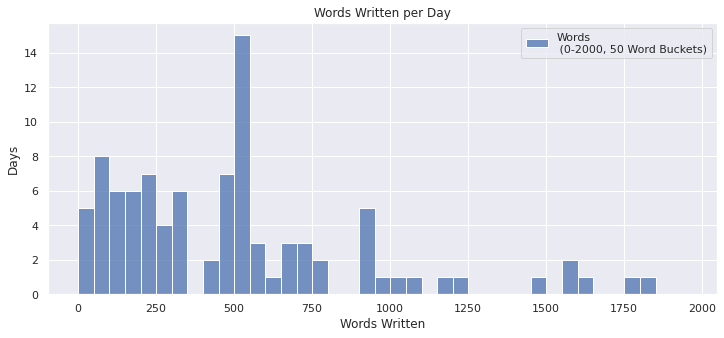

In [49]:
#excluding days I didn't write anything
plt.figure(figsize=(12, 5))
plt.title("Words Written per Day")
#plt.hist(writing_df['Daily Word Count'], bins=np.arange(1, 2000, 50));
plt.ylabel('Days')
plt.xlabel('Words Written')
sns.histplot(writing_df['Daily Word Count'], bins=np.arange(1, 2000, 50));
plt.legend(['Words\n (0-2000, 50 Word Buckets)']);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}_hist.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

In [30]:
writing_df_monthly = pd.DataFrame()
writing_df_monthly['Monthly Written'] = np.arange(0.0, 12.0)
writing_df_monthly.at[0, 'Monthly Written'] = writing_df[writing_df.Month == 1][['Daily Word Count']].sum()

In [31]:
writing_df_monthly

,Monthly Written
0,5623.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [32]:
writing_df_monthly.at[1, 'Monthly Written'] = writing_df[writing_df.Month == 2][['Daily Word Count']].sum()
writing_df_monthly.at[2, 'Monthly Written'] = writing_df[writing_df.Month == 3][['Daily Word Count']].sum()
writing_df_monthly.at[3, 'Monthly Written'] = writing_df[writing_df.Month == 4][['Daily Word Count']].sum()
writing_df_monthly.at[4, 'Monthly Written'] = writing_df[writing_df.Month == 5][['Daily Word Count']].sum()
writing_df_monthly.at[5, 'Monthly Written'] = writing_df[writing_df.Month == 6][['Daily Word Count']].sum()
writing_df_monthly.at[6, 'Monthly Written'] = writing_df[writing_df.Month == 7][['Daily Word Count']].sum()
writing_df_monthly.at[7, 'Monthly Written'] = writing_df[writing_df.Month == 8][['Daily Word Count']].sum()
writing_df_monthly.at[8, 'Monthly Written'] = writing_df[writing_df.Month == 9][['Daily Word Count']].sum()
writing_df_monthly.at[9, 'Monthly Written'] = writing_df[writing_df.Month == 10][['Daily Word Count']].sum()
writing_df_monthly.at[10, 'Monthly Written'] = writing_df[writing_df.Month == 11][['Daily Word Count']].sum()
writing_df_monthly.at[11, 'Monthly Written'] = writing_df[writing_df.Month == 12][['Daily Word Count']].sum()

In [33]:
writing_df_monthly

,Monthly Written
0,5623.0
1,7379.0
2,18984.0
3,12539.0
4,0.0
5,0.0
6,0.0
7,47.0
8,0.0
9,0.0


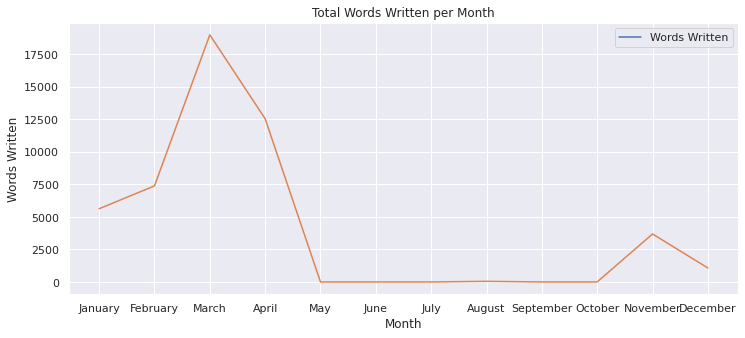

In [45]:
# plt.figure(figsize=(12, 5))
# plt.plot(writing_df_monthly['Monthly Written'], 's-b')

# plt.xlabel('Months')
# plt.ylabel('Words Written')

# plt.title("Total Words Written per Month")
# #plt.xticks(np.arange(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
# plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=0)
# plt.legend(['Words Written']);

x = writing_df_monthly['Monthly Written']
plt.figure(figsize=(12, 5))
plt.title("Words Written per Month")
plt.xlabel('Month')
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=0)
plt.ylabel('Words Written')
sns.lineplot(x=x)
plt.plot(writing_df_monthly['Monthly Written'])
plt.legend(['Words Written']);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

In [35]:
writing_df_weekly = pd.DataFrame()
writing_df_weekly['Weekly Written'] = np.arange(1,54)

# year = 2020
# month = 1
# day = 1

# year = writing_df['Year']
# month = writing_df['Month']
# day = writing_df['Day']

# for row in writing_df:
#     writing_df_weekly.at[row, 'Weekly Written'] = datetime.date(year, month, day).strftime("%U")

In [36]:

# num1 = np.arange(0,53)
# num2 = np.arange(1,54)
# for num in num1, num2:
#     writing_df_weekly.at[num1, 'Weekly Written'] = writing_df[writing_df.Week == num2][['Daily Word Count']].sum()
# writing_df_weekly

# don't know how to do this easier than copy + pasting
# Get a ValueError: ('Lengths must match to compare', (370,), (53,))

In [37]:
writing_df_weekly

,Weekly Written
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [38]:
writing_df_weekly.at[0, 'Weekly Written'] = writing_df[writing_df.Week == 1][['Daily Word Count']].sum()
writing_df_weekly.at[1, 'Weekly Written'] = writing_df[writing_df.Week == 2][['Daily Word Count']].sum()
writing_df_weekly.at[2, 'Weekly Written'] = writing_df[writing_df.Week == 3][['Daily Word Count']].sum()
writing_df_weekly.at[3, 'Weekly Written'] = writing_df[writing_df.Week == 4][['Daily Word Count']].sum()
writing_df_weekly.at[4, 'Weekly Written'] = writing_df[writing_df.Week == 5][['Daily Word Count']].sum()
writing_df_weekly.at[5, 'Weekly Written'] = writing_df[writing_df.Week == 6][['Daily Word Count']].sum()
writing_df_weekly.at[6, 'Weekly Written'] = writing_df[writing_df.Week == 7][['Daily Word Count']].sum()
writing_df_weekly.at[7, 'Weekly Written'] = writing_df[writing_df.Week == 8][['Daily Word Count']].sum()
writing_df_weekly.at[8, 'Weekly Written'] = writing_df[writing_df.Week == 9][['Daily Word Count']].sum()
writing_df_weekly.at[9, 'Weekly Written'] = writing_df[writing_df.Week == 10][['Daily Word Count']].sum()
writing_df_weekly.at[10, 'Weekly Written'] = writing_df[writing_df.Week == 11][['Daily Word Count']].sum()
writing_df_weekly.at[11, 'Weekly Written'] = writing_df[writing_df.Week == 12][['Daily Word Count']].sum()

writing_df_weekly.at[12, 'Weekly Written'] = writing_df[writing_df.Week == 13][['Daily Word Count']].sum()
writing_df_weekly.at[13, 'Weekly Written'] = writing_df[writing_df.Week == 14][['Daily Word Count']].sum()
writing_df_weekly.at[14, 'Weekly Written'] = writing_df[writing_df.Week == 15][['Daily Word Count']].sum()
writing_df_weekly.at[15, 'Weekly Written'] = writing_df[writing_df.Week == 16][['Daily Word Count']].sum()
writing_df_weekly.at[16, 'Weekly Written'] = writing_df[writing_df.Week == 17][['Daily Word Count']].sum()
writing_df_weekly.at[17, 'Weekly Written'] = writing_df[writing_df.Week == 18][['Daily Word Count']].sum()
writing_df_weekly.at[18, 'Weekly Written'] = writing_df[writing_df.Week == 19][['Daily Word Count']].sum()
writing_df_weekly.at[19, 'Weekly Written'] = writing_df[writing_df.Week == 20][['Daily Word Count']].sum()
writing_df_weekly.at[20, 'Weekly Written'] = writing_df[writing_df.Week == 21][['Daily Word Count']].sum()
writing_df_weekly.at[21, 'Weekly Written'] = writing_df[writing_df.Week == 22][['Daily Word Count']].sum()
writing_df_weekly.at[22, 'Weekly Written'] = writing_df[writing_df.Week == 23][['Daily Word Count']].sum()
writing_df_weekly.at[23, 'Weekly Written'] = writing_df[writing_df.Week == 24][['Daily Word Count']].sum()

writing_df_weekly.at[24, 'Weekly Written'] = writing_df[writing_df.Week == 25][['Daily Word Count']].sum()
writing_df_weekly.at[25, 'Weekly Written'] = writing_df[writing_df.Week == 26][['Daily Word Count']].sum()
writing_df_weekly.at[26, 'Weekly Written'] = writing_df[writing_df.Week == 27][['Daily Word Count']].sum()
writing_df_weekly.at[27, 'Weekly Written'] = writing_df[writing_df.Week == 28][['Daily Word Count']].sum()
writing_df_weekly.at[28, 'Weekly Written'] = writing_df[writing_df.Week == 29][['Daily Word Count']].sum()
writing_df_weekly.at[29, 'Weekly Written'] = writing_df[writing_df.Week == 30][['Daily Word Count']].sum()
writing_df_weekly.at[30, 'Weekly Written'] = writing_df[writing_df.Week == 31][['Daily Word Count']].sum()
writing_df_weekly.at[31, 'Weekly Written'] = writing_df[writing_df.Week == 32][['Daily Word Count']].sum()
writing_df_weekly.at[32, 'Weekly Written'] = writing_df[writing_df.Week == 33][['Daily Word Count']].sum()
writing_df_weekly.at[33, 'Weekly Written'] = writing_df[writing_df.Week == 34][['Daily Word Count']].sum()
writing_df_weekly.at[34, 'Weekly Written'] = writing_df[writing_df.Week == 35][['Daily Word Count']].sum()
writing_df_weekly.at[35, 'Weekly Written'] = writing_df[writing_df.Week == 36][['Daily Word Count']].sum()

writing_df_weekly.at[36, 'Weekly Written'] = writing_df[writing_df.Week == 37][['Daily Word Count']].sum()
writing_df_weekly.at[37, 'Weekly Written'] = writing_df[writing_df.Week == 38][['Daily Word Count']].sum()
writing_df_weekly.at[38, 'Weekly Written'] = writing_df[writing_df.Week == 39][['Daily Word Count']].sum()
writing_df_weekly.at[39, 'Weekly Written'] = writing_df[writing_df.Week == 40][['Daily Word Count']].sum()
writing_df_weekly.at[40, 'Weekly Written'] = writing_df[writing_df.Week == 41][['Daily Word Count']].sum()
writing_df_weekly.at[41, 'Weekly Written'] = writing_df[writing_df.Week == 42][['Daily Word Count']].sum()
writing_df_weekly.at[42, 'Weekly Written'] = writing_df[writing_df.Week == 43][['Daily Word Count']].sum()
writing_df_weekly.at[43, 'Weekly Written'] = writing_df[writing_df.Week == 44][['Daily Word Count']].sum()
writing_df_weekly.at[44, 'Weekly Written'] = writing_df[writing_df.Week == 45][['Daily Word Count']].sum()
writing_df_weekly.at[45, 'Weekly Written'] = writing_df[writing_df.Week == 46][['Daily Word Count']].sum()
writing_df_weekly.at[46, 'Weekly Written'] = writing_df[writing_df.Week == 47][['Daily Word Count']].sum()
writing_df_weekly.at[47, 'Weekly Written'] = writing_df[writing_df.Week == 48][['Daily Word Count']].sum()

writing_df_weekly.at[48, 'Weekly Written'] = writing_df[writing_df.Week == 49][['Daily Word Count']].sum()
writing_df_weekly.at[49, 'Weekly Written'] = writing_df[writing_df.Week == 50][['Daily Word Count']].sum()
writing_df_weekly.at[50, 'Weekly Written'] = writing_df[writing_df.Week == 51][['Daily Word Count']].sum()
writing_df_weekly.at[51, 'Weekly Written'] = writing_df[writing_df.Week == 52][['Daily Word Count']].sum()
writing_df_weekly.at[52, 'Weekly Written'] = writing_df[writing_df.Week == 53][['Daily Word Count']].sum()


In [39]:
writing_df_weekly['Weekly Written']

0      444
1     1110
2     1147
3     1792
4     2152
5      279
6     3146
7     1292
8     1640
9     1357
10    3721
11    6115
12    6620
13    3129
14    5225
15    3037
16    1829
17     490
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32      47
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44     524
45    1202
46    1959
47       0
48     586
49       0
50       0
51     489
52       0
Name: Weekly Written, dtype: int64

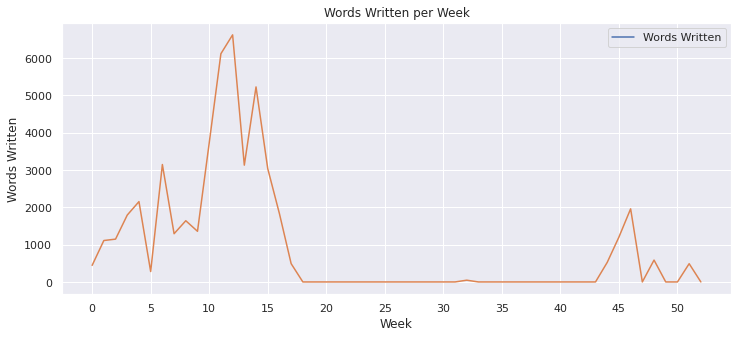

In [40]:
# plt.figure(figsize=(12, 5))
# plt.plot(writing_df_weekly['Weekly Written'], 's-b')

# plt.xlabel('Week')
# plt.ylabel('Words Written')

# plt.title("Total Words Written per Week")
# plt.xticks(np.arange(0, 52, step=5))

# plt.legend(['Words Written']);

x = writing_df_weekly['Weekly Written']
plt.figure(figsize=(12, 5))
plt.title('Words Written per Week')
plt.xlabel('Week')
plt.xticks(np.arange(0, 52, step=5))
plt.ylabel('Words Written')
sns.lineplot(x=x)
plt.plot(writing_df_weekly['Weekly Written'])
plt.legend(['Words Written']);

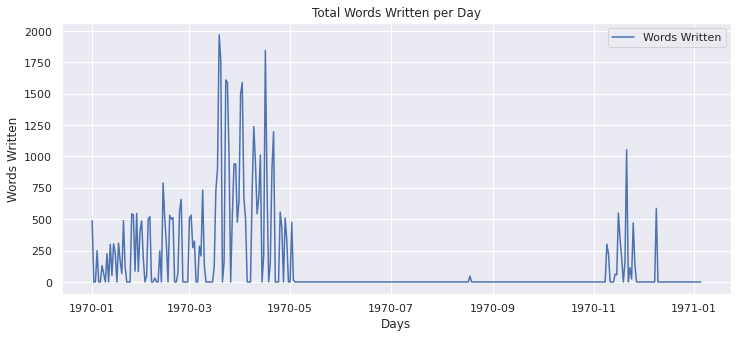

In [41]:
y = writing_df['Daily Word Count']
x = writing_df['Date']
plt.figure(figsize=(12, 5))
plt.title("Total Words Written per Day")
plt.xlabel('Days')
plt.xticks()
plt.ylabel('Words Written')
plt.plot(writing_df['Daily Word Count'])
sns.lineplot(x=x)
plt.legend(['Words Written']);
#fix the dates

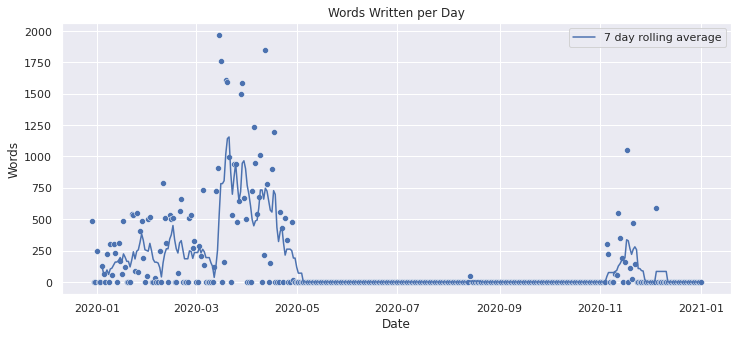

In [50]:
x = writing_df.Date
y = writing_df['Daily Word Count']
title = 'Words Written per Day'

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel('Date')
plt.xticks()
plt.ylabel('Words')
plt.plot(x, writing_df['Daily Word Count'].rolling(7).mean() ,label= '7 day rolling average');
sns.scatterplot(x = x, y = y );plt.legend(['7 day rolling average']);
plt.legend(['7 day rolling average']);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

In [43]:
writing_df['Daily Word Count'].rolling(7).mean().max()
#highest 7 day average word count

1154.7142857142858

In [44]:
writing_df['Daily Word Count'].rolling(7).mean().std()

229.95787582131015